In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv('CleanData\movies_final.csv')

C:\Users\quint\AppData\Local\Temp\ipykernel_27364\3741509116.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('CleanData\movies_final.csv')


In [3]:
print("\nPorcentaje de valores nulos:")
print(df.isnull().sum() / len(df) * 100)


Porcentaje de valores nulos:
budget                0.002370
id                    0.000000
original_language     0.026068
overview              2.137593
popularity            0.002370
release_date          0.000000
revenue               0.000000
runtime               0.568761
status                0.180108
tagline              54.880679
title                 0.002370
vote_average          0.002370
vote_count            0.002370
collection           89.928194
genre                 5.275257
company              26.229353
country              13.782970
language              8.820532
release_year          0.000000
return                0.000000
dtype: float64


In [4]:
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [5]:
print(df.dtypes)

budget               float64
id                    object
original_language     object
overview              object
popularity           float64
release_date          object
revenue              float64
runtime              float64
status                object
tagline               object
title                 object
vote_average         float64
vote_count           float64
collection            object
genre                 object
company               object
country               object
language              object
release_year           int64
return               float64
dtype: object


In [6]:
print(df.describe())

             budget    popularity       revenue       runtime  vote_average  \
count  4.219600e+04  42196.000000  4.219700e+04  41957.000000  42196.000000   
mean   4.160088e+06      2.914097  1.116644e+07     93.853302      5.631261   
std    1.721499e+07      5.744661  6.377105e+07     37.685002      1.921395   
min    0.000000e+00      0.000000  0.000000e+00      0.000000      0.000000   
25%    0.000000e+00      0.387424  0.000000e+00     85.000000      5.000000   
50%    0.000000e+00      1.136089  0.000000e+00     95.000000      6.000000   
75%    0.000000e+00      3.717885  0.000000e+00    107.000000      6.800000   
max    3.800000e+08    547.488298  2.787965e+09   1256.000000     10.000000   

         vote_count  release_year        return  
count  42196.000000  42197.000000  4.219700e+04  
mean     109.391720   1991.915160  7.097397e+02  
std      489.341742     23.839548  7.745563e+04  
min        0.000000   1874.000000  0.000000e+00  
25%        3.000000   1978.000000  0.0

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts(normalize=True).head())


Distribución de id:
id
862       0.000024
74314     0.000024
38433     0.000024
140472    0.000024
5056      0.000024
Name: proportion, dtype: float64

Distribución de original_language:
original_language
en    0.711160
fr    0.053122
it    0.034348
ja    0.030579
de    0.023847
Name: proportion, dtype: float64

Distribución de overview:
overview
No overview found.                                            0.003124
No Overview                                                   0.000170
                                                              0.000121
No movie overview available.                                  0.000073
A few funny little novels about different aspects of life.    0.000073
Name: proportion, dtype: float64

Distribución de release_date:
release_date
2008-01-01    0.002986
2009-01-01    0.002678
2007-01-01    0.002607
2005-01-01    0.002512
2006-01-01    0.002228
Name: proportion, dtype: float64

Distribución de status:
status
Released           0.992165
Rumored   

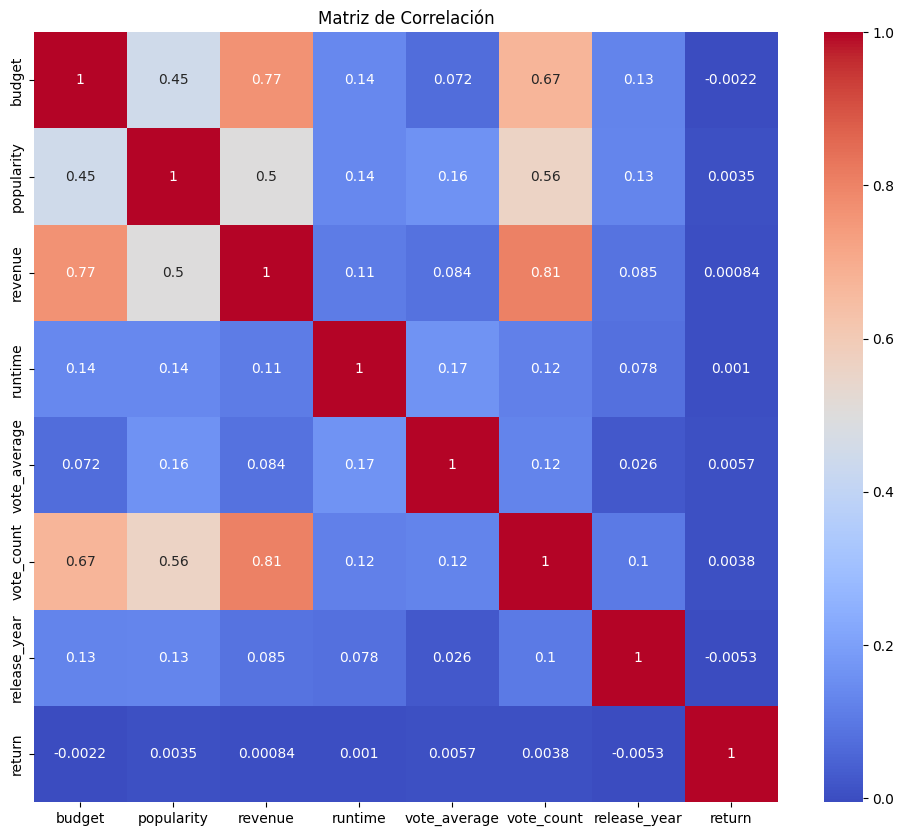

In [8]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

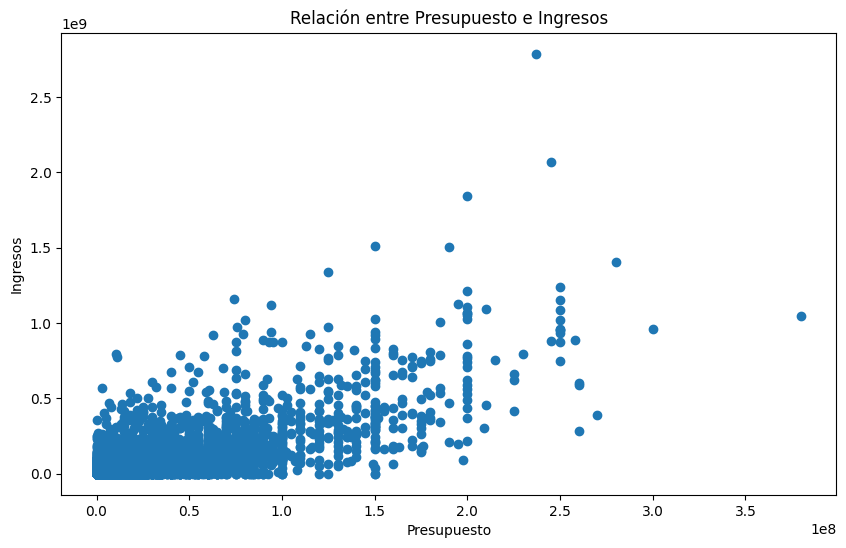

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.title('Relación entre Presupuesto e Ingresos')
plt.show()

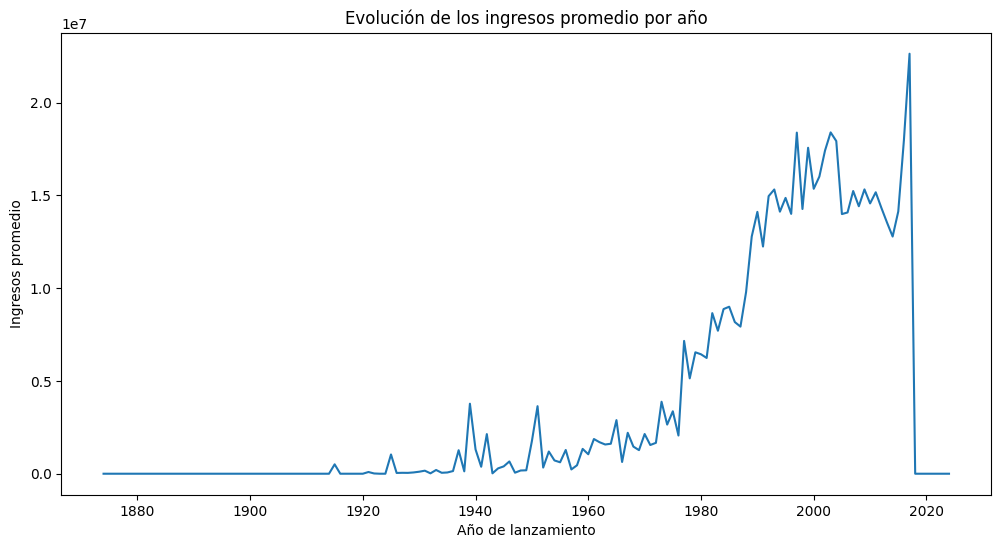

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(12,6))
df.groupby('release_year')['revenue'].mean().plot()
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ingresos promedio')
plt.title('Evolución de los ingresos promedio por año')
plt.show()

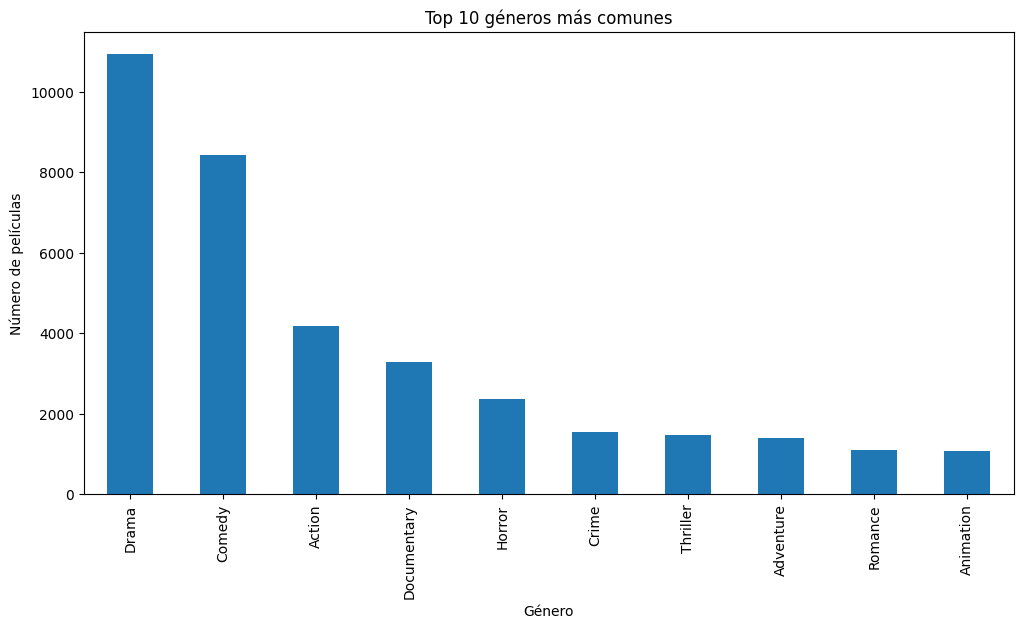

In [11]:
genres = df['genre'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
genres.head(10).plot(kind='bar')
plt.title('Top 10 géneros más comunes')
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.show()

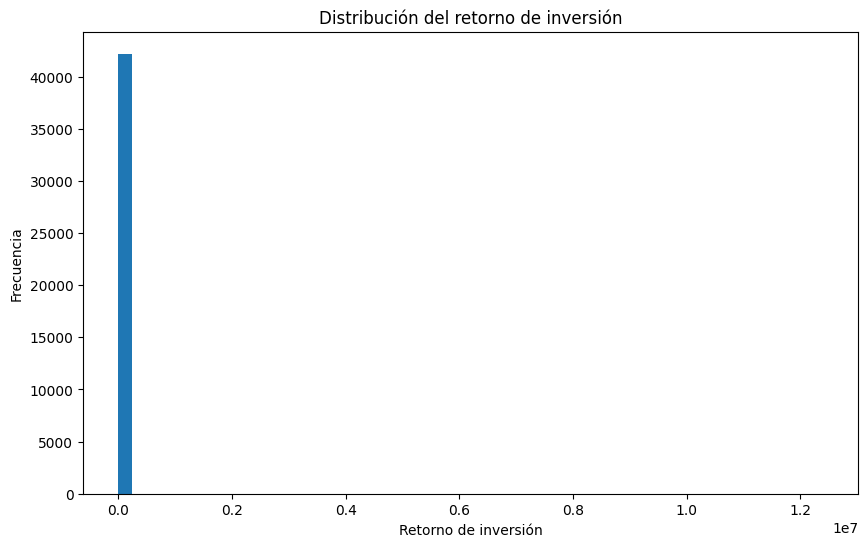

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df['return'], bins=50)
plt.xlabel('Retorno de inversión')
plt.ylabel('Frecuencia')
plt.title('Distribución del retorno de inversión')
plt.show()

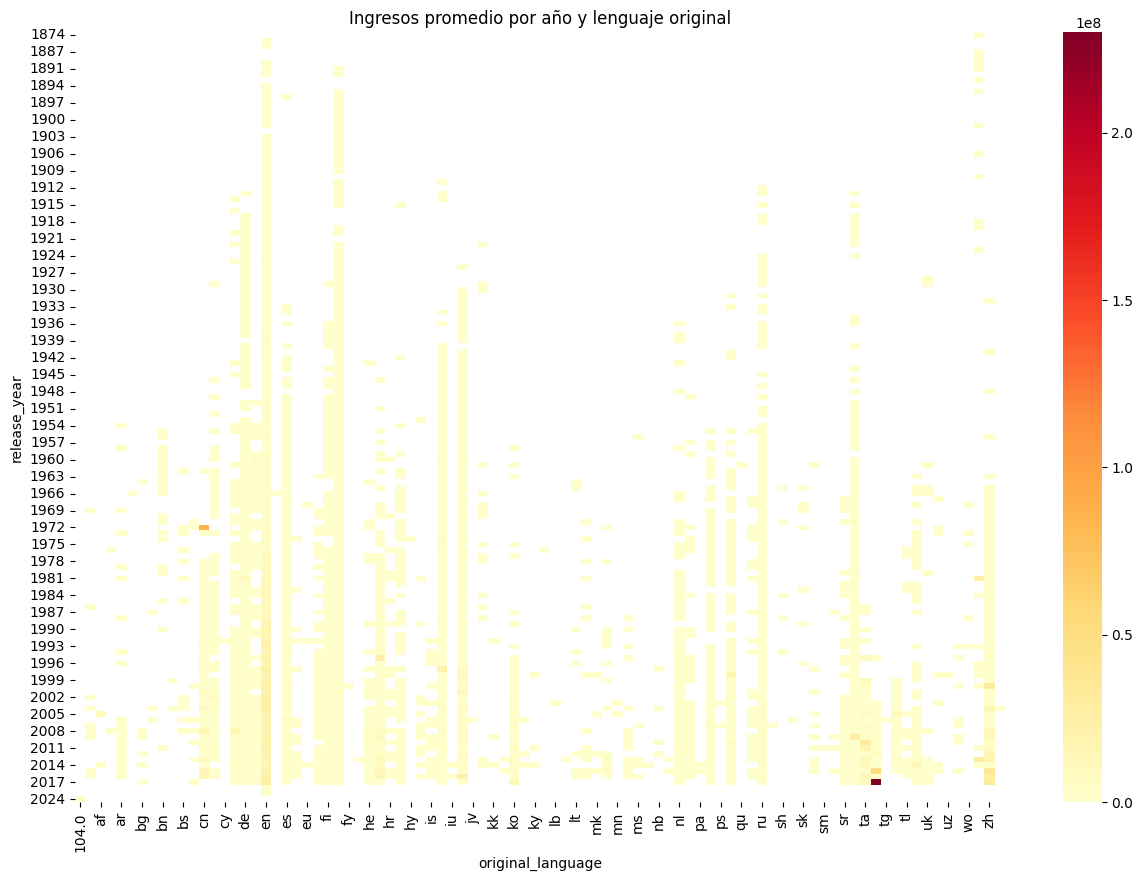

In [13]:
pivot = df.pivot_table(values='revenue', index='release_year', columns='original_language', aggfunc='mean')
plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='YlOrRd', annot=False)
plt.title('Ingresos promedio por año y lenguaje original')
plt.show()

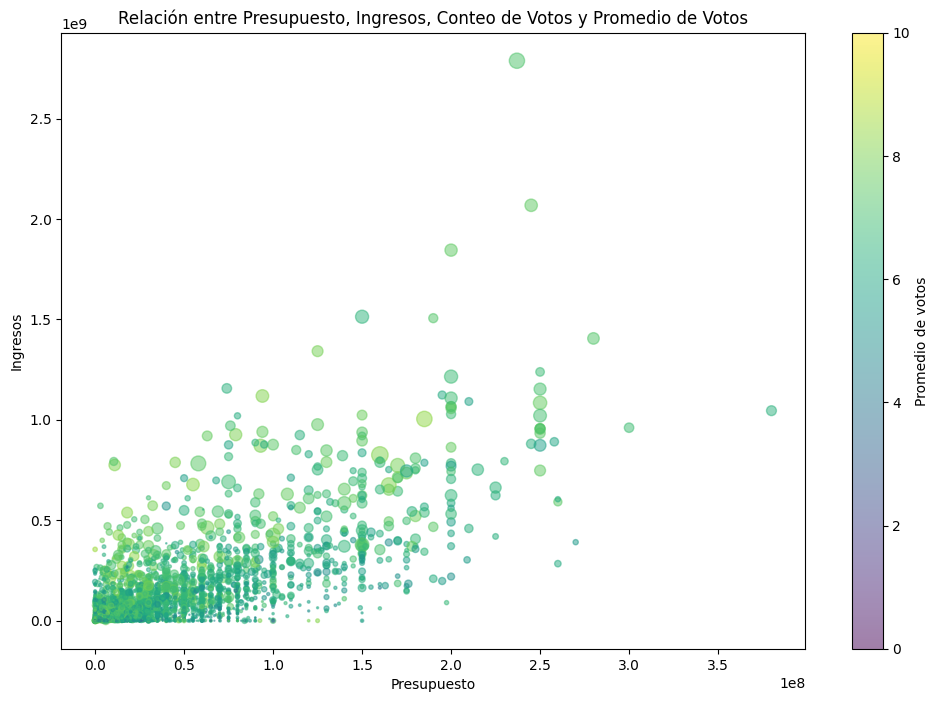

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df['budget'], df['revenue'], s=df['vote_count']/100, alpha=0.5, c=df['vote_average'], cmap='viridis')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.title('Relación entre Presupuesto, Ingresos, Conteo de Votos y Promedio de Votos')
plt.colorbar(label='Promedio de votos')
plt.show()